<h1>Trabalho A4 de Análise de Negócios com Big Data</h1>
Integrantes: Hanna Doumit Mansour Neto (1220103916), Lucas da Silva Moreira (1220101684) e Samara Costa de Almeida (1220103763)

<h1>Base de dados</h1>
Para o trabalho usamos a base de dados sobre <b>venda de casas em Ponta Grossa - PR</b><br>
<br>
<a href=https://www.kaggle.com/datasets/victorstein/casas-venda-ponta-grossa-pr>https://www.kaggle.com/datasets/victorstein/casas-venda-ponta-grossa-pr</a>

<h1>Tratamento dos dados e exclusão de colunas</h1>
Para que os dados usados estejam completos excluimos os registros com dados faltando. Para o próximo passo criamos uma cópia descartando as colunas Quartos, Banheiros, Suítes, Vagas de Garagem e Área Total

In [32]:
import pandas as pd
import numpy as np

#Importando dataframe
df=pd.read_csv(r"/workspaces/codespaces-jupyter/casas_ponta_grossa.csv")

#Tratamento de registros incompletos
df=df.dropna(inplace=False,axis=0)

#Reset dos índices para ficarem em ordem
df=df.reset_index(drop=True)

#Converter valores das colunas Quartos, Banheiros, Suítes e Vagas de Garagem em inteiro
df[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']]=df[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].apply(lambda x: x.astype(int))

#Remoção da coluna Área Total
df_clean=df.drop(columns=['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total'])

#Exibição do DataFrame tratado
display(df)

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3,2,0,2,Uvaranas,164,"R$430,000.00"
1,146507-4,3,2,1,2,Uvaranas,80,"R$169,900.00"
2,120001-4,1,1,0,2,Boa Vista,360,"R$150,000.00"
3,147038-4,2,1,0,1,Uvaranas,40,"R$130,000.00"
4,126629-4,2,1,0,1,Contorno / Sta. Paula,45,"R$126,900.00"
...,...,...,...,...,...,...,...,...
1676,21910-4,3,3,1,2,Neves,300,"R$730,000.00"
1677,154858-4,4,4,1,6,Boa Vista,640,"R$700,000.00"
1678,106906-4,3,5,2,2,Uvaranas,314,"R$700,000.00"
1679,81553-4,4,3,1,2,Nova Rússia,400,"R$700,000.00"


<h1>Identificação do problema</h1>
Digamos que o banco de dados de vendas de casas seja usado por uma empresa de consultoria de imóveis e que um de seus clientes deseja comprar uma casa em Ponta Grossa sem preferência de bairro querendo saber apenas o preço do imóvel mais em conta.<br><br>
Primeiramente, é feita a remoção dos outliers, os imóveis com características extremamente diferentes dos demais para montar tabelas de cálculos de indicadores como média, soma dos preços e preços mínimo e máximo por bairro.<br>
Para facilitar a visualização dos dados montamos gráficos de barras para cada tabela.<br><br>

Por fim, para encontrar uma solução para o problema proposto atribuímos para cada característica dos imóveis um peso e a partir disso foi calculada e pontuação ponderada de cada registro. Montamos uma tabela a partir do custo benefício obtido com a razão entre pontuação e preço e agrupamos apenas os imóveis com melhor custo benefício para serem passados como opções para o cliente.

In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt #para criar os graficos
from matplotlib.ticker import FuncFormatter
import numpy as np

pd.options.mode.chained_assignment = None

def fomartar_moeda_grafico():
        return plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "R${:,.2f}".format(x)))

# Configurar a formatação de números de ponto flutuante
pd.options.display.float_format = 'R${:,.2f}'.format

df['Valor Venda'] = df['Valor Venda'].apply(lambda x: float(x))

# retirar outliers

# Calcular o IQR (intervalo interquartil) para 'area_total'
Q1 = df['Área Total'].quantile(0.25)
Q3 = df['Área Total'].quantile(0.75)
IQR = Q3 - Q1

# Definir um limite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# DataFrame "outliers" com os valores discrepantes
outliers = df[(df['Área Total'] < limite_inferior) | (df['Área Total'] > limite_superior)]

print("Valores Discrepantes (Outliers):")
display(outliers)

# Remover os outliers do DataFrame principal
df = df[~((df['Área Total'] < limite_inferior) | (df['Área Total'] > limite_superior))]

print("DataFrame sem outliers:")
display(df)

Valores Discrepantes (Outliers):


,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
6,134592-4,4,6,2,3,Estrela,990,"R$1,800,000.00"
13,120198-4,2,2,1,3,Jardim Carvalho,1683,"R$680,000.00"
24,148013-4,4,4,1,3,Uvaranas,896,"R$650,000.00"
45,132911-4,4,3,1,2,Orfãs,660,"R$630,000.00"
56,20900-4,4,1,2,5,Ronda,990,"R$600,000.00"
68,129054-4,2,3,1,3,Oficinas,712,"R$600,000.00"
74,131488-4,3,1,0,2,Uvaranas,660,"R$590,000.00"
79,23624-4,3,3,1,5,Uvaranas,1000,"R$580,000.00"
99,40484-4,3,2,2,4,Uvaranas,720,"R$550,000.00"
115,119785-4,3,1,0,2,Uvaranas,660,"R$520,000.00"


DataFrame sem outliers:


,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3,2,0,2,Uvaranas,164,"R$430,000.00"
1,146507-4,3,2,1,2,Uvaranas,80,"R$169,900.00"
2,120001-4,1,1,0,2,Boa Vista,360,"R$150,000.00"
3,147038-4,2,1,0,1,Uvaranas,40,"R$130,000.00"
4,126629-4,2,1,0,1,Contorno / Sta. Paula,45,"R$126,900.00"
...,...,...,...,...,...,...,...,...
1676,21910-4,3,3,1,2,Neves,300,"R$730,000.00"
1677,154858-4,4,4,1,6,Boa Vista,640,"R$700,000.00"
1678,106906-4,3,5,2,2,Uvaranas,314,"R$700,000.00"
1679,81553-4,4,3,1,2,Nova Rússia,400,"R$700,000.00"


<h1>Cálculo de indicadores da amostra</h1>

<p>Para termos informações gerais sobre o banco de dados, agrupamos os dados por bairro e realizamos cálculos em cima do valor de venda, cálculos como quantidade de vendas, soma, média, valor máximo e valor mínimo.</p>

In [34]:
#tabelas

print("\nQuantidade de Apto por Bairro\n")
quantidade_vendas_por_bairro = df['Bairro'].value_counts().reset_index()
quantidade_vendas_por_bairro.columns = ['Bairro', 'Quantidade de Vendas']
display(quantidade_vendas_por_bairro)

print("\nValor Minimo de Venda por Bairro\n")
venda_minima_por_bairro = df.groupby('Bairro')['Valor Venda'].min().sort_values(ascending=True).reset_index()
venda_minima_por_bairro.columns = ['Bairro', 'Valor Mínima']
display(venda_minima_por_bairro)

print("\nValor Medio de Venda por Bairro\n")
media_valor_apartamento_por_bairro = df.groupby('Bairro')['Valor Venda'].mean().sort_values(ascending=False).reset_index()
media_valor_apartamento_por_bairro.columns = ['Bairro', 'Média de Valor de Apartamento']
display(media_valor_apartamento_por_bairro)

print("\nValor Maximo de Venda por Bairro\n")
venda_maxima_por_bairro = df.groupby('Bairro')['Valor Venda'].max().sort_values(ascending=False).reset_index()
venda_maxima_por_bairro.columns = ['Bairro', 'Valor Máximo']
display(venda_maxima_por_bairro)

print("\nValor Total de Venda por Bairro\n")
valor_total_vendido_por_bairro = df.groupby('Bairro')['Valor Venda'].sum().sort_values(ascending=False).reset_index()
valor_total_vendido_por_bairro.columns = ['Bairro', 'Valor Total Ofertado']
display(valor_total_vendido_por_bairro)


Quantidade de Apto por Bairro



,Bairro,Quantidade de Vendas
0,Uvaranas,354
1,Jardim Carvalho,272
2,Oficinas,185
3,Estrela,159
4,Cará-cará,92
5,Orfãs,79
6,Nova Rússia,75
7,Neves,73
8,Boa Vista,68
9,Colônia Dona Luiza,63



Valor Minimo de Venda por Bairro



,Bairro,Valor Mínima
0,Cará-cará,"R$57,875.00"
1,Uvaranas,"R$60,000.00"
2,Colônia Dona Luiza,"R$70,000.00"
3,Jardim Carvalho,"R$75,000.00"
4,Ronda,"R$90,000.00"
5,Chapada,"R$95,000.00"
6,Olarias,"R$95,000.00"
7,Estrela,"R$100,000.00"
8,Orfãs,"R$100,000.00"
9,Boa Vista,"R$110,000.00"



Valor Medio de Venda por Bairro



,Bairro,Média de Valor de Apartamento
0,Orfãs,"R$980,748.10"
1,Estrela,"R$953,283.02"
2,Centro,"R$915,652.17"
3,Colônia Dona Luiza,"R$751,952.38"
4,Jardim Carvalho,"R$673,750.74"
5,Oficinas,"R$665,994.59"
6,Nova Rússia,"R$495,986.67"
7,Neves,"R$426,436.99"
8,Olarias,"R$396,789.47"
9,Uvaranas,"R$357,677.80"



Valor Maximo de Venda por Bairro



,Bairro,Valor Máximo
0,Colônia Dona Luiza,"R$4,200,000.00"
1,Orfãs,"R$3,990,000.00"
2,Estrela,"R$3,600,000.00"
3,Centro,"R$2,900,000.00"
4,Jardim Carvalho,"R$2,400,000.00"
5,Contorno / Sta. Paula,"R$2,000,000.00"
6,Oficinas,"R$2,000,000.00"
7,Uvaranas,"R$1,900,000.00"
8,Boa Vista,"R$1,500,000.00"
9,Olarias,"R$1,500,000.00"



Valor Total de Venda por Bairro



,Bairro,Valor Total Ofertado
0,Jardim Carvalho,"R$183,260,200.00"
1,Estrela,"R$151,572,000.00"
2,Uvaranas,"R$126,617,941.00"
3,Oficinas,"R$123,209,000.00"
4,Orfãs,"R$77,479,100.00"
5,Colônia Dona Luiza,"R$47,373,000.00"
6,Centro,"R$42,120,000.00"
7,Nova Rússia,"R$37,199,000.00"
8,Neves,"R$31,129,900.00"
9,Boa Vista,"R$21,459,000.00"


<h1>Resumo</h1>
Na tabela de quantidade de venda o bairro há mais casas à venda é <b>Uravanas</b> seguido de <b>Jardim Carvalho</b> e o de menos casas à venda é <b>Olarias</b><br>
Na tabela de valor mínimo de venda o bairro com o maior preço mínimo à venda é <b>Centro</b>, <b>Cará-cará</b> é o que possui o menor valor mínimo.<br>
Na tabela de valor máximo de venda o bairro com o maior preço máximo é <b>Colônia Dona Luiza</b> e o menor valor máximo é <b>Ronda</b>.<br>
Na tabela de média o bairro com o maior valor médio é <b>Orfãs</b> e o com o menor valor médio é <b>Cará-cará</b>.<br>
Na tabela de soma total o bairro com a maior soma é <b>Jardim Carvalho</b> e o com a menor soma total é <b>Olarias</b>.<br><br>

Tendo esses bairros em mente, é possível analisar cada um e atribuir certas características:

*   <b>Uravanas</b>: bairro com maior quantidade de casas à venda e terceira maior soma de total ofertado, os preços variam bastante entre 60 mil até quase 2 milhões e possui uma média razoável em comparação com as outras e com terceira maior total ofertado de vendas, com os dados podemos ver que o bairro talvez não tenha muitos moradores e que a variedade de preço está sendo usada como atrativo para compradores.
*   <b>Jardim Carvalho</b>: segundo bairro com mais casas à venda e com maior total ofertado com grande variação de preço entre 70 mil e mais de 2 milhões e possui uma média razoavelmente alta, o que indica que o bairro usa a variação de preço para tentar atrair compradores.
*   <b>Colônia Dona Luiza</b>: bairro com menos de 100 casas à venda, um dos menores valores mínimos com 70 mil e o maior valor máximo à venda, e por isso apresenta média alta, sua alta variedade de preço pode influenciar sua quantidade de casas à venda se comparado com os bairros anteriores.
*   <b>Cará-cará</b>: bairro com quantidade de casas razoavelmente com baixo valor de soma e os menores valores de preços mínimo e máximo entre 57 mil e 950 mil e logo menor média, é um bairro mais simples no quesito preço de imóveis que pode ser considerado popular para compradores de baixo poder aquisitivo.
*   <b>Orfãs</b>: menos popular que Cará-cará, com valor mínimo mediano e o maior valor máximo justificando a soma alta, a partir disso pode-se dizer que o bairro possui compradores com mais poder aquisitivo podendo até ser considerado um bairro nobre da cidade.
*   <b>Centro</b>: um dos bairros com menor número de casas à venda vendas porém com valor total mediano comparado com outros bairros, possui o maior preço mínimo e alto preço máximo o que resulta na terceira maior média de preço, a quantidade pode ser influenciada pelos preços altos ofertados mas também pelas carasterísticas desta região e seus compradores possuem um poder aquisitivo maior.
*   <b>Olarias</b>: bairro com menos casas à venda e por consequência menor valor total ofertado de vendas, possui valor mínimo e valor máximo razoavelmente baixo comparado com outros e com uma média de quase 400 mil, a quantidade de casas compradas no bairro vai depender da sua situação.

Diante disso e dos dados analisados é possível inferir que a quantidade de vendas de cada bairro pode ser motivada em parte pela variedade de preço mas que não há como ter certeza sem considerar outras variáveis em questão como a estrutura das casas, tipo de comprador e características dos bairros que podem atrair mais compradores.

<h1>Apresentação dos gráficos dos indicadores</h1>

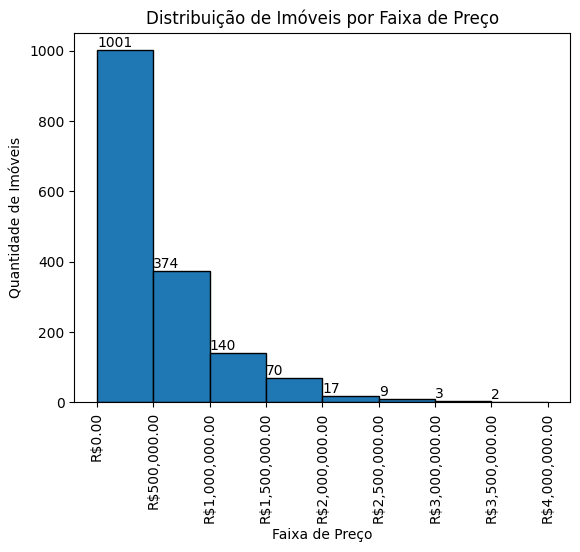

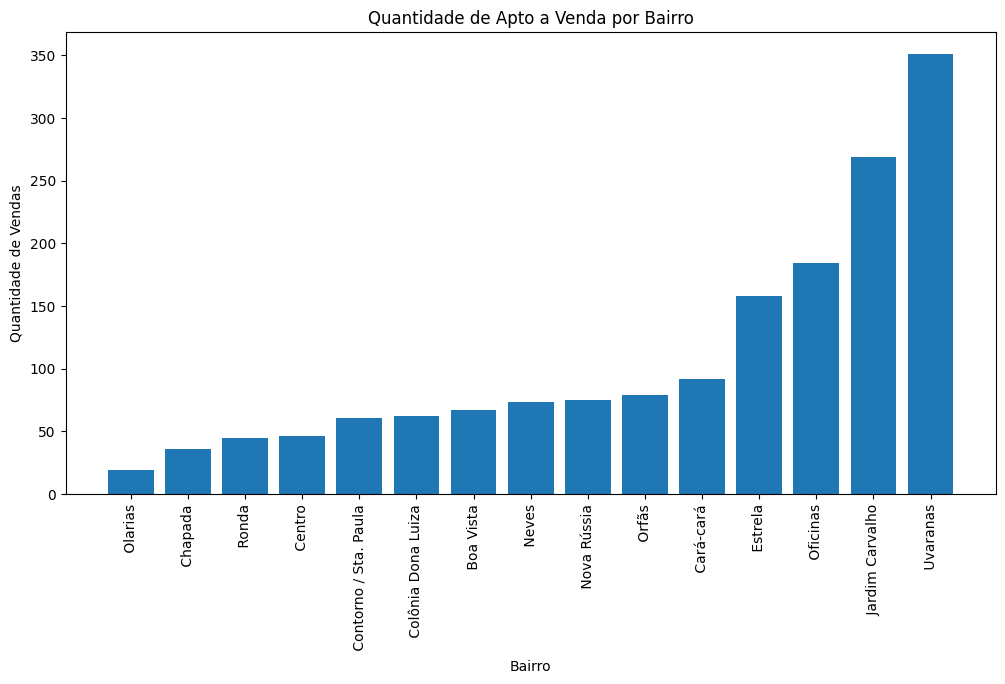

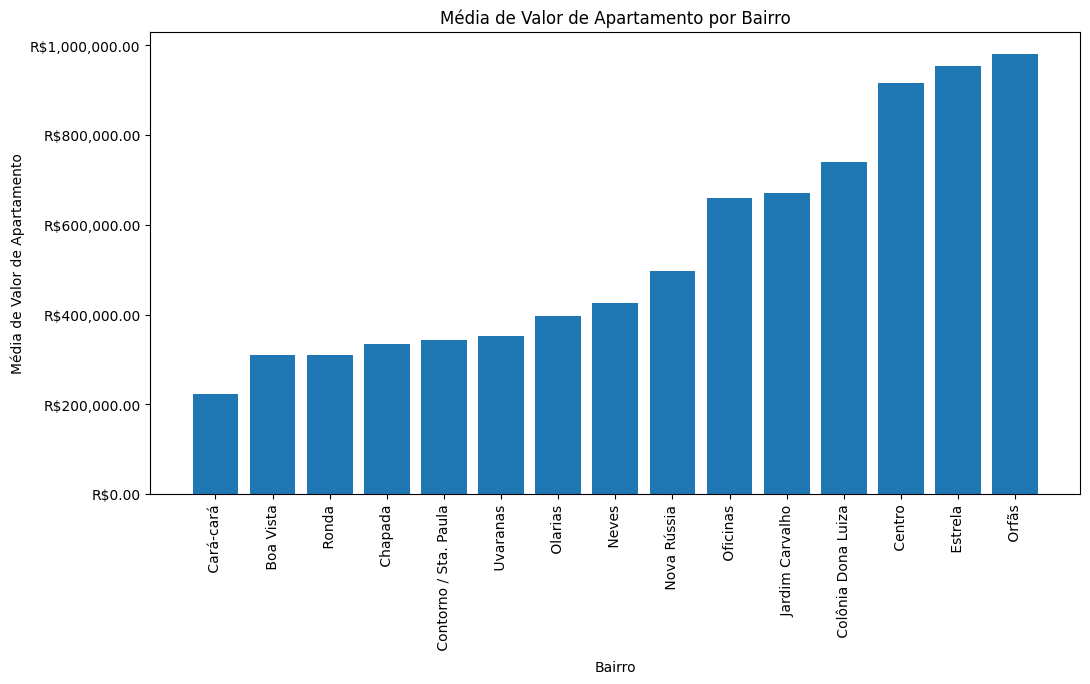

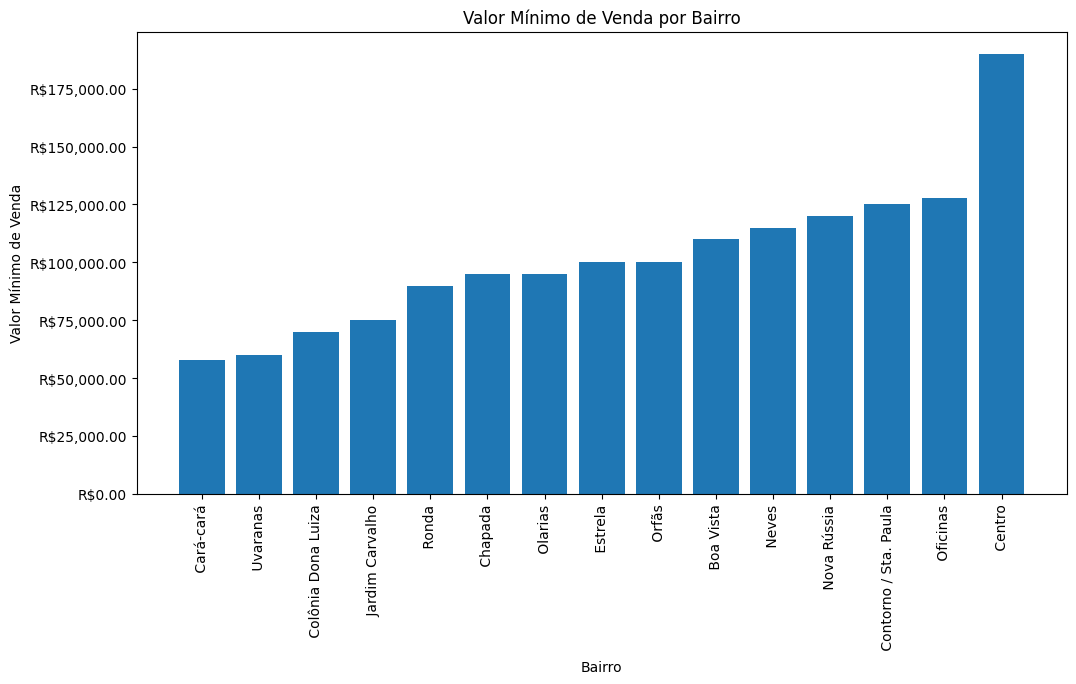

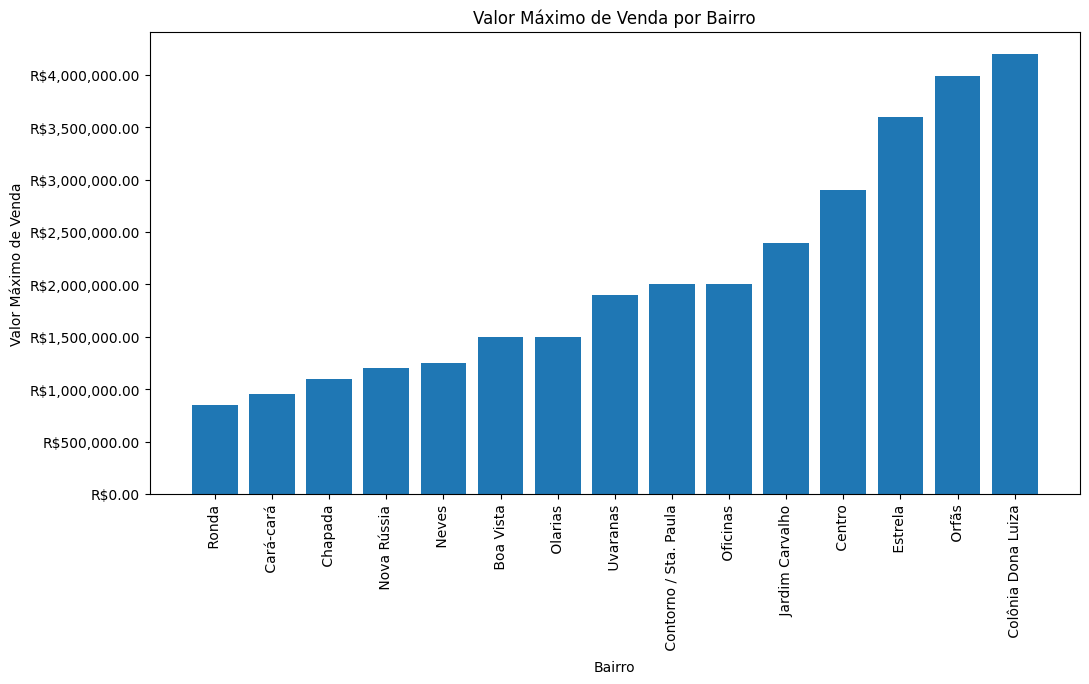

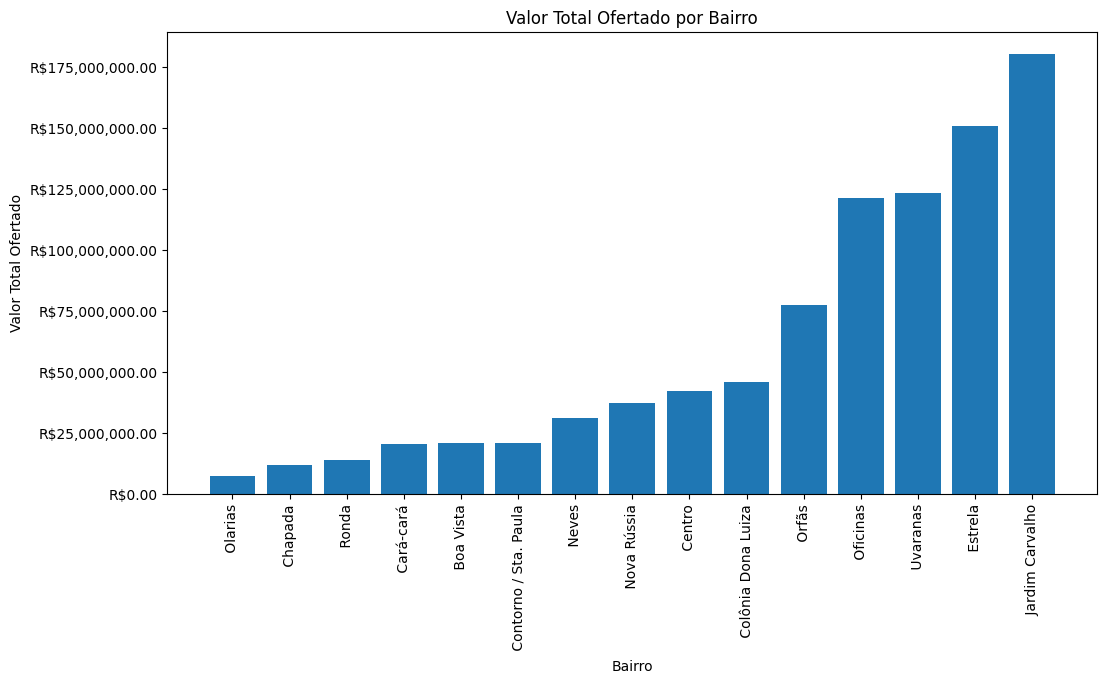

In [29]:
#graficos

# histograma de faixas

faixas_de_preco = [0,500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000]

plt.hist(df['Valor Venda'], bins=faixas_de_preco, edgecolor='k')

plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade de Imóveis')
plt.title('Distribuição de Imóveis por Faixa de Preço')

for i, bin_count in enumerate(np.histogram(df['Valor Venda'], bins=faixas_de_preco)[0]):
    plt.text(faixas_de_preco[i], bin_count, str(bin_count), ha='left', va='bottom')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: "R${:,.2f}".format(x)))
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras para a quantidade de vendas por bairro:

quantidade_vendas_por_bairro = quantidade_vendas_por_bairro.sort_values(by='Quantidade de Vendas', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(quantidade_vendas_por_bairro['Bairro'], quantidade_vendas_por_bairro['Quantidade de Vendas'])
plt.xlabel('Bairro')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Apto a Venda por Bairro')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras para a média de valor de apartamento por bairro:

media_valor_apartamento_por_bairro = media_valor_apartamento_por_bairro.sort_values(by='Média de Valor de Apartamento', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(media_valor_apartamento_por_bairro['Bairro'], media_valor_apartamento_por_bairro['Média de Valor de Apartamento'])
plt.xlabel('Bairro')
plt.ylabel('Média de Valor de Apartamento')
plt.title('Média de Valor de Apartamento por Bairro')
plt.xticks(rotation=90)
fomartar_moeda_grafico()
plt.show()


# Gráfico de barras para o valor mínimo de venda por bairro:

venda_minima_por_bairro = venda_minima_por_bairro.sort_values(by='Valor Mínima', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(venda_minima_por_bairro['Bairro'], venda_minima_por_bairro['Valor Mínima'])
plt.xlabel('Bairro')
plt.ylabel('Valor Mínimo de Venda')
plt.title('Valor Mínimo de Venda por Bairro')
plt.xticks(rotation=90)
fomartar_moeda_grafico()
plt.show()

# Gráfico de barras para o valor máximo de venda por bairro:

venda_maxima_por_bairro = venda_maxima_por_bairro.sort_values(by='Valor Máximo', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(venda_maxima_por_bairro['Bairro'], venda_maxima_por_bairro['Valor Máximo'])
plt.xlabel('Bairro')
plt.ylabel('Valor Máximo de Venda')
plt.title('Valor Máximo de Venda por Bairro')
plt.xticks(rotation=90)
fomartar_moeda_grafico()
plt.show()

# Gráfico de barras para o valor total vendido por bairro:

valor_total_vendido_por_bairro = valor_total_vendido_por_bairro.sort_values(by='Valor Total Ofertado', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(valor_total_vendido_por_bairro['Bairro'], valor_total_vendido_por_bairro['Valor Total Ofertado'])
plt.xlabel('Bairro')
plt.ylabel('Valor Total Ofertado')
plt.title('Valor Total Ofertado por Bairro')
plt.xticks(rotation=90)
fomartar_moeda_grafico()
plt.show()


In [30]:
#compilado - analises especifica

# Defina os pesos para cada característica (quanto maior o peso, mais importante a característica)
peso_quartos = 10
peso_suites = 15
peso_banheiros = 10
peso_vagas_garagem = 7
peso_area_total = 1

# dataFrame vazio para armazenar as melhores opções por bairro
melhores_opcoes_por_bairro = pd.DataFrame(columns=df.columns)

# bairros únicos no DataFrame
frames=[]

bairros_unicos = df['Bairro'].unique()
for bairro in bairros_unicos:
    # Filtrar o DataFrame para o bairro atual
    df_bairro = df[df['Bairro'] == bairro]

    # Calcule a pontuação ponderada para cada apartamento no bairro atual
    df_bairro['Pontuação'] = (
        peso_quartos * df_bairro['Quartos'] +
        peso_suites * df_bairro['Suítes'] +
        peso_banheiros * df_bairro['Banheiros'] +
        peso_vagas_garagem * df_bairro['Vagas de Garagem'] +
        peso_area_total * df_bairro['Área Total']
    )

    # Calcule o custo-benefício (razão entre a pontuação e o preço)
    df_bairro['Custo Benefício'] = df_bairro['Pontuação'] / df_bairro['Valor Venda']

    # Encontre a melhor opção de custo-benefício no bairro atual
    melhor_custo_beneficio_bairro = df_bairro.loc[df_bairro['Custo Benefício'].idxmax()]

    frames.append(melhor_custo_beneficio_bairro)

# Adicione a melhor opção de custo-benefício do bairro ao DataFrame de melhores opções por bairro
melhores_opcoes_por_bairro=pd.DataFrame.from_records(frames)

# Exiba as melhores opções de custo-benefício por bairro
print("\nMelhores Opções de Custo-Benefício por Bairro:\n")
display(melhores_opcoes_por_bairro[['Bairro', 'Quartos', 'Suítes', 'Banheiros', 'Vagas de Garagem', 'Área Total', 'Valor Venda']])


Melhores Opções de Custo-Benefício por Bairro:



,Bairro,Quartos,Suítes,Banheiros,Vagas de Garagem,Área Total,Valor Venda
0,Uvaranas,4,0,2,1,469,"R$120,000.00"
1,Boa Vista,2,0,1,2,468,"R$180,000.00"
2,Contorno / Sta. Paula,3,0,1,2,465,"R$170,000.00"
3,Estrela,3,0,1,6,462,"R$450,000.00"
4,Orfãs,2,0,1,2,510,"R$340,000.00"
5,Jardim Carvalho,1,0,1,1,275,"R$120,000.00"
6,Oficinas,2,0,1,1,490,"R$150,000.00"
7,Neves,3,0,1,1,275,"R$115,000.00"
8,Chapada,2,0,1,2,548,"R$130,000.00"
9,Nova Rússia,2,0,1,3,495,"R$160,000.00"


<h1>Dados estatísticos de uma amostra aleatória</h1>

In [31]:
df_amostra=df.sample(n=500)
amostra=df_amostra.describe()
amostra[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']]=amostra[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].apply(lambda x: x.astype(int))
amostra[1:]

,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total,Valor Venda
mean,2,2,0,2,207,"R$551,676.60"
std,0,1,0,1,138,"R$514,549.40"
min,1,1,0,1,24,"R$60,000.00"
25%,3,1,0,1,92,"R$210,000.00"
50%,3,2,1,2,165,"R$360,000.00"
75%,3,3,1,2,300,"R$742,500.00"
max,7,8,4,8,607,"R$3,990,000.00"
